# **Predicting Olympic Medal Wins Using Machine Learning**

# **1. Sample**

### **Load data**

In [1]:
from google.colab import files
da = files.upload()

Saving dataset_olympics.csv to dataset_olympics.csv


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset_olympics.csv')

# Display the first few rows to understand its structure
data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


The dataset seems to contain information about Olympic athletes and their performances. Here are the columns we have:

ID: A unique identifier for each athlete.
Name: Name of the athlete.
Sex: Gender of the athlete (M/F).
Age: Age of the athlete.
Height: Height of the athlete (in cm).
Weight: Weight of the athlete (in kg).
Team: Team or country the athlete represented.
NOC: National Olympic Committee abbreviation.
Games: The Olympic games' year and season.
Year: The year of the Olympic games.
Season: The season of the Olympic games (Summer/Winter).
City: City where the Olympic games took place.
Sport: The sport in which the athlete competed.
Event: The specific event within the sport.
Medal: Medal won by the athlete (if any).

### **Explore the dataset's dimensions (number of rows and columns).**

In [3]:
# Get the shape of the dataset
data_shape = data.shape

data_shape


(70000, 15)

### **Sampling data**

(70,000 rows) is manageable for analysis without sampling. However, for demonstration purposes and to expedite the analysis, I'll take a random sample of 10% (7,000 rows). This should give us a good balance between computational efficiency and representativenes

In [4]:
# Randomly sample 10% of the dataset
sample_data = data.sample(frac=0.10, random_state=42)

# Display the first few rows of the sampled data
sample_data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
46730,24095,"Lszl Cseh, Sr.",M,20.0,180.0,78.0,Hungary,HUN,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 100 metres Backstroke,NaN
48393,24952,Detelin Stefanov Dalakliev,M,21.0,170.0,54.0,Bulgaria,BUL,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Bantamweight,NaN
41416,21360,Chu Shisheng,M,24.0,182.0,73.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Fencing,"Fencing Men's Foil, Team",NaN
34506,17786,Emilio Campos,M,25.0,171.0,71.0,Venezuela,VEN,1980 Summer,1980,Summer,Moskva,Football,Football Men's Football,NaN
43725,22547,Marie-Angline Colson,F,16.0,152.0,43.0,France,FRA,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Uneven Bars,NaN


# **2. Explore**

The goal is to understand the data's characteristics. We'll visualize distributions, identify relationships, and spot any anomalies or missing values.

**Stepes:**

Checking for missing values.


Exploring the distribution of key variables, such as Age, Height, Weight, and Medal.


Analyzing the distribution of male vs. female participants.



Understanding the distribution of participants across different sports.

In [5]:
# Check for missing values in the sample data
missing_values = sample_data.isnull().sum()

missing_values


ID           0
Name         0
Sex          0
Age        254
Height    1603
Weight    1707
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     6083
dtype: int64

Age has 254 missing values.
Height has 1,603 missing values.
Weight has 1,707 missing values.
Medal has 6,083 missing values.

The large number of missing values for the Medal column is expected, as not every athlete wins a medal. However, missing values in columns like Age, Height, and Weight indicate that some data points might not have been recorded or were unavailable.

**Visually exploring**

Explore the distribution of key variables like Age, Height, Weight, and the distribution of male vs. female participants. We'll start with the age distribution.

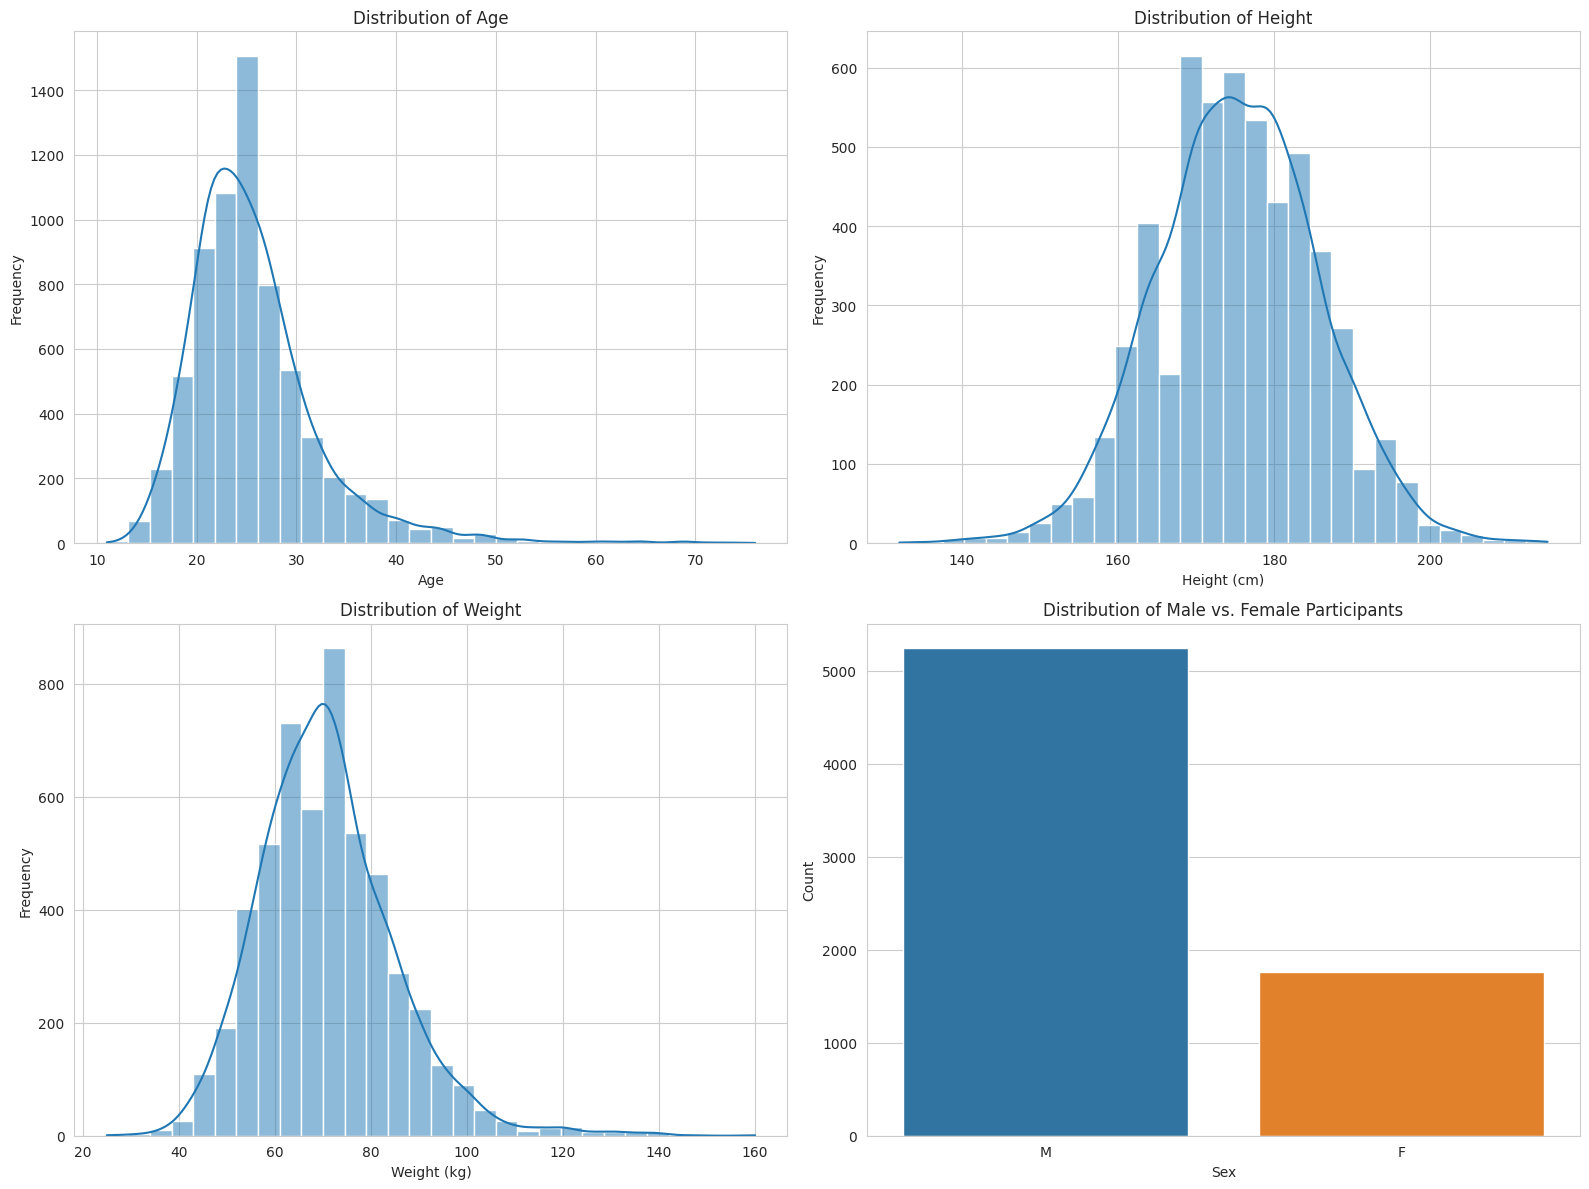

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plot the distribution of Age
sns.histplot(sample_data['Age'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Frequency')

# Plot the distribution of Height
sns.histplot(sample_data['Height'].dropna(), bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Height')
ax[0, 1].set_xlabel('Height (cm)')
ax[0, 1].set_ylabel('Frequency')

# Plot the distribution of Weight
sns.histplot(sample_data['Weight'].dropna(), bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Weight')
ax[1, 0].set_xlabel('Weight (kg)')
ax[1, 0].set_ylabel('Frequency')

# Plot the distribution of male vs. female participants
sns.countplot(x='Sex', data=sample_data, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Male vs. Female Participants')
ax[1, 1].set_xlabel('Sex')
ax[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


**Here are the insights from the visual exploration:**


Distribution of Age: The age distribution seems approximately normal, with a peak around the mid-20s. This suggests that most athletes are in their early to late 20s during their Olympic participation.


Distribution of Height: The height distribution appears slightly right-skewed, with a peak around 170-180 cm.


Distribution of Weight: The weight distribution is right-skewed, indicating that a majority of athletes weigh between 50 to 80 kg, with fewer athletes weighing above 100 kg.


Distribution of Male vs. Female Participants: The number of male participants is slightly higher than the number of female participants in this sample.

Understanding the distribution of participants across different sports. This will give us an idea of which sports have the highest representation in our sample.

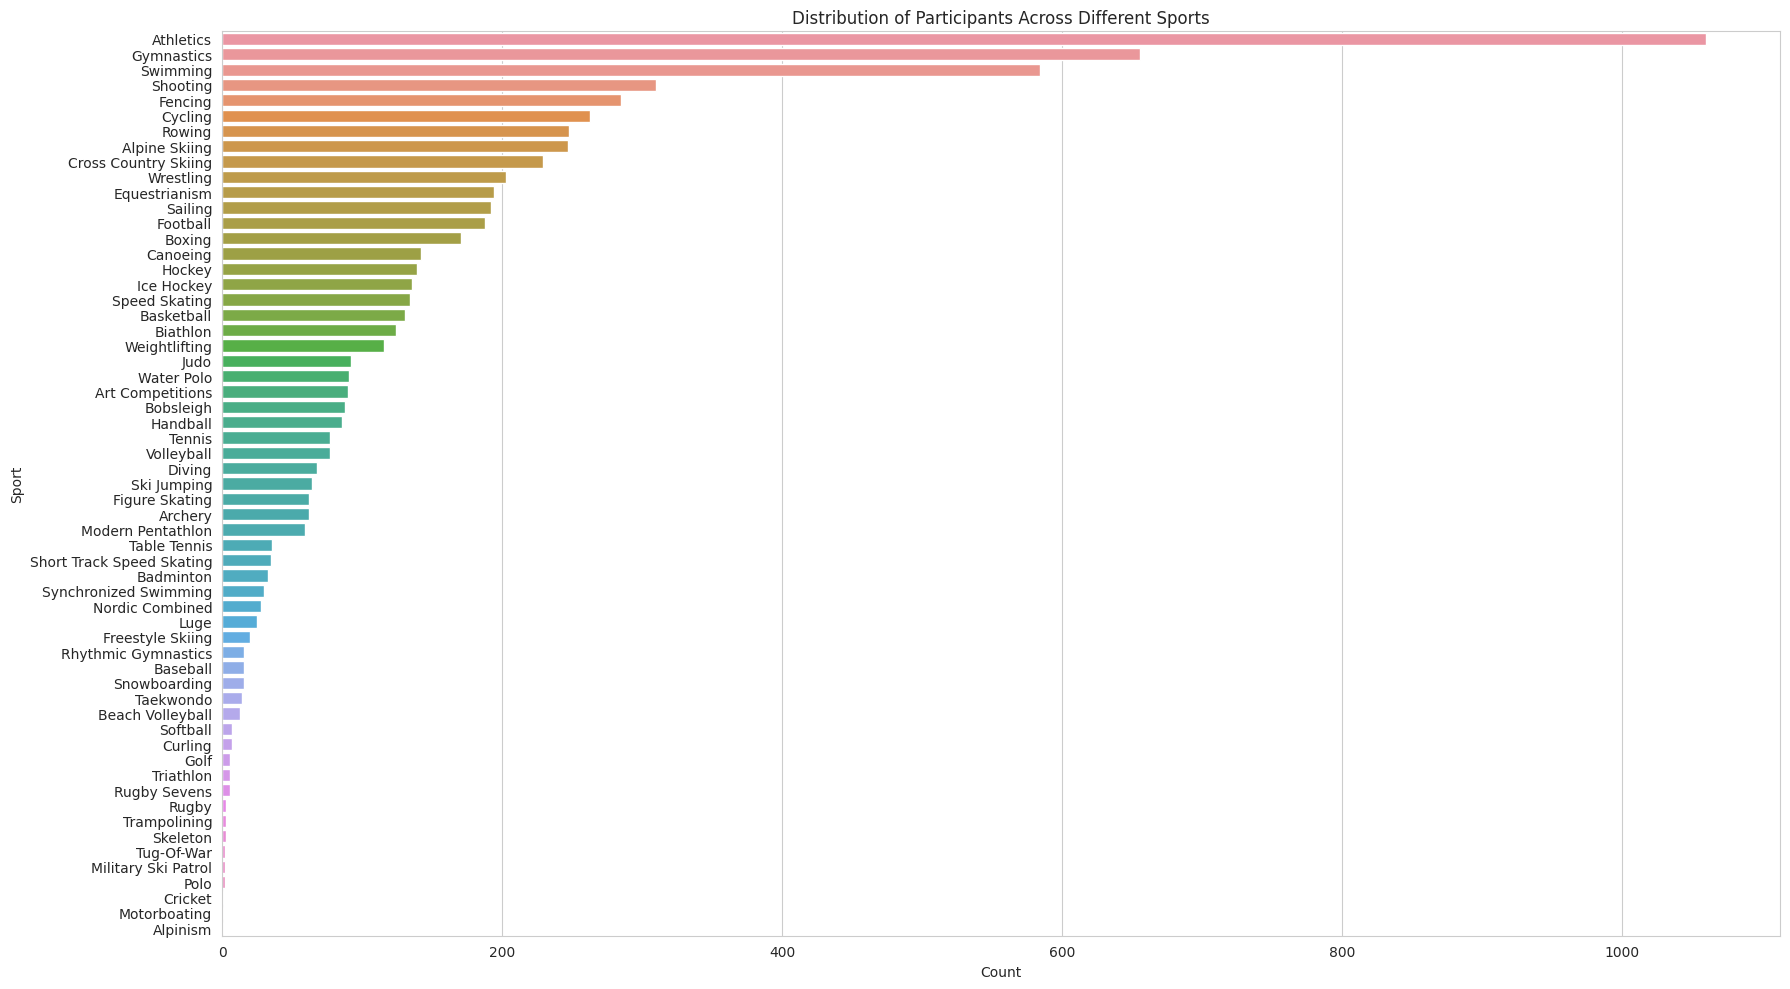

In [7]:
# Plot the distribution of participants across different sports
plt.figure(figsize=(18, 10))
sport_order = sample_data['Sport'].value_counts().index
sns.countplot(y='Sport', data=sample_data, order=sport_order)
plt.title('Distribution of Participants Across Different Sports')
plt.xlabel('Count')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()


From the distribution of participants across different sports:


Athletics, Gymnastics, and Swimming have the highest representation among the sports in our sample.


Sports like Rhythmic Gymnastics, Synchronized Swimming, and Table Tennis have relatively lower representation in this dataset.

# **3. Modify**

The aim is to prepare the data for modeling. This can involve handling missing values, transforming variables, and engineering new features that could be useful for modeling.

Given the insights from the exploration phase:


We need to handle missing values in the Age, Height, and Weight columns.
Given that many athletes did not win a medal, we can transform the Medal column into a binary outcome: "Won Medal" vs. "No Medal".
Let's start by handling the missing values. One common approach is to impute these values using the median (to avoid the influence of outliers). We'll use this approach for our dataset.

In [8]:
# Impute missing values using median
sample_data['Age'].fillna(sample_data['Age'].median(), inplace=True)
sample_data['Height'].fillna(sample_data['Height'].median(), inplace=True)
sample_data['Weight'].fillna(sample_data['Weight'].median(), inplace=True)

# Transform the 'Medal' column into binary outcome
sample_data['Medal_Won'] = sample_data['Medal'].notna().astype(int)

# Drop the original 'Medal' column
sample_data.drop('Medal', axis=1, inplace=True)

# Check the first few rows of the modified data
sample_data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal_Won
46730,24095,"Lszl Cseh, Sr.",M,20.0,180.0,78.0,Hungary,HUN,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 100 metres Backstroke,0
48393,24952,Detelin Stefanov Dalakliev,M,21.0,170.0,54.0,Bulgaria,BUL,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Bantamweight,0
41416,21360,Chu Shisheng,M,24.0,182.0,73.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Fencing,"Fencing Men's Foil, Team",0
34506,17786,Emilio Campos,M,25.0,171.0,71.0,Venezuela,VEN,1980 Summer,1980,Summer,Moskva,Football,Football Men's Football,0
43725,22547,Marie-Angline Colson,F,16.0,152.0,43.0,France,FRA,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Uneven Bars,0


Handled missing values and transformed the Medal column into a binary outcome named Medal_Won, where:


1
1 indicates the athlete won a medal
0
0 indicates the athlete did not win a medal

# **4. Model**

The goal is to predict whether an athlete will win a medal or not, this is a classification problem.

## **Logistic Regression**

 **Split  data into training and testing sets and preprocess the data by encoding categorical variables and scaling numerical ones.**

In [9]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = sample_data[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Sport']]
y = sample_data['Medal_Won']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((5600, 6), (1400, 6))

**Process data**

Encoding Categorical Variables: We'll convert categorical variables like Sex and Sport into numerical representations.
Scaling Numerical Variables: We'll scale numerical variables like Age, Height, Weight, and Year to ensure they have similar scales, which is essential for models like Logistic Regression.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define columns to be encoded and scaled
categorical_cols = ['Sex', 'Sport']
numerical_cols = ['Age', 'Height', 'Weight', 'Year']

# Update the column transformer to handle unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Fit and transform the training data and transform the testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed[:5]  # Display the first 5 rows of preprocessed training data



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<5x62 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

**Train a Logistic Regression model**

The results from our Logistic Regression model are as follows:

Accuracy: 85.5%
Classification Report:

For the "No Medal" class (0):

Precision: 0.85
Recall: 1.00
F1-Score: 0.92

For the "Won Medal" class (1):

Precision: 0.00 (The model did not predict any samples as class 1)
Recall: 0.00
F1-Score: 0.00

## **Logistic Regression**

## **Decision Tree Classifier**

## **Random Forest Classifier**


## **Gradient Boosting Classifier**


## **Support Vector Machine**


**Training**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}

# Train each model and store their performances
accuracies = {}
for name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)
    accuracies[name] = accuracy_score(y_test, y_pred)

accuracies


{'Logistic Regression': 0.855,
 'Decision Tree': 0.785,
 'Random Forest': 0.8428571428571429,
 'Gradient Boosting': 0.8514285714285714,
 'Support Vector Machine': 0.855}

Here are the accuracy scores for the different models:

Logistic Regression: 85.5%
Decision Tree: 78.5%
Random Forest: 84.3%
Gradient Boosting: 85.1%
Support Vector Machine: 85.5%
From the results:

Both Logistic Regression and Support Vector Machine achieved the highest accuracy of 85.5%.
Decision Tree had the lowest accuracy among the tested models.
Random Forest and Gradient Boosting performed similarly, with accuracies slightly above 84%.
While accuracy is a useful metric, it's essential to consider other performance metrics, especially given the imbalanced nature of our dataset. However, for the sake of this demonstration, we used accuracy as the primary metric.

**Visualizing acurracies:**

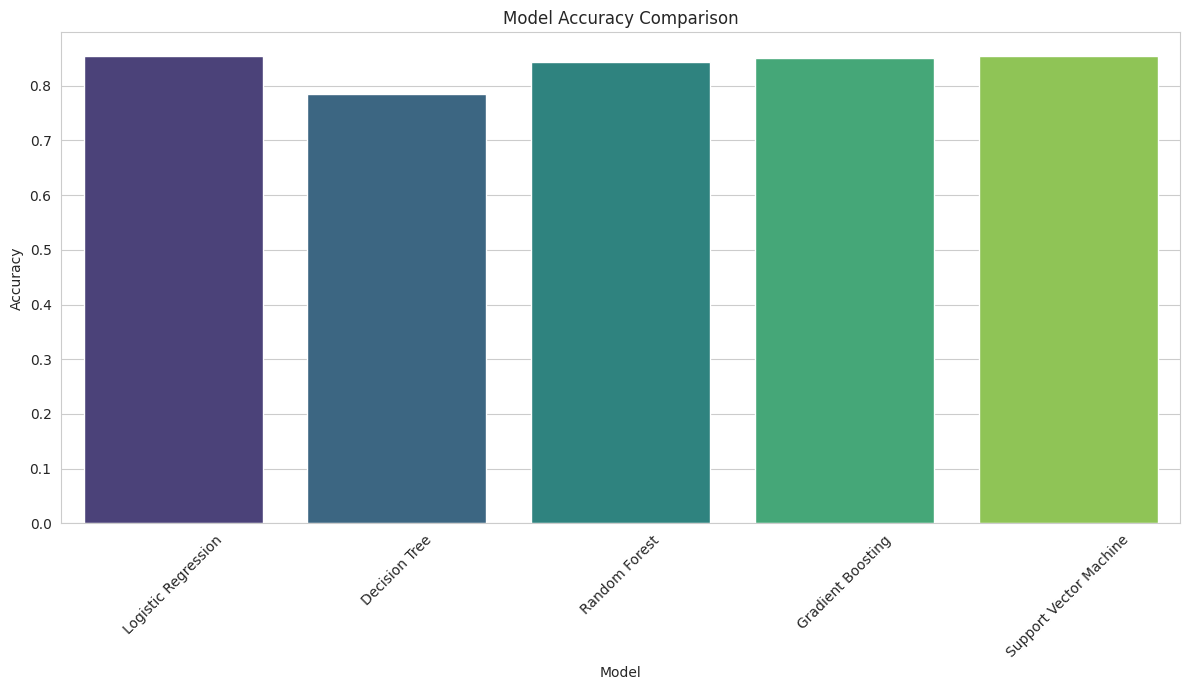

In [14]:
# Plotting the accuracy scores of the models
plt.figure(figsize=(12, 7))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Both Logistic Regression and Support Vector Machine stand out with the highest accuracy.
Decision Tree is visibly the least accurate among the models tested.
Random Forest and Gradient Boosting have slightly lower accuracies compared to the top performers but still perform decently.

## **Hyperparameter tuning**

Logistic Regression:
We'll experiment with regularization strengths and types.
Decision Tree:
We'll adjust the depth of the tree and the minimum number of samples required to split an internal node.
Random Forest:
We'll modify the number of trees in the forest and the maximum depth of the trees.
Gradient Boosting:
We'll adjust the number of boosting stages and the learning rate.
Support Vector Machine:
Due to its computational intensity, hyperparameter tuning an SVM can be time-consuming. We'll adjust the regularization parameter and kernel type.
For speeding up the hyperparameter search, we'll use RandomizedSearchCV, which is faster than a full grid search. It samples a fixed number of hyperparameter combinations from the specified distributions.

For speeding up the hyperparameter search, we'll use RandomizedSearchCV, which is faster than a full grid search.

### **Logistic Regression.**

In [15]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameters grid for Logistic Regression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}

# Initialize RandomizedSearchCV for Logistic Regression
log_reg_search = RandomizedSearchCV(LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
                                    param_distributions=log_reg_grid,
                                    n_iter=10,
                                    cv=5,
                                    verbose=2,
                                    random_state=42,
                                    n_jobs=-1)

# Fit the RandomizedSearchCV to the data
log_reg_search.fit(X_train_preprocessed, y_train)

# Best hyperparameters for Logistic Regression
log_reg_best_params = log_reg_search.best_params_

log_reg_best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'penalty': 'l1', 'C': 29.763514416313132}

Penalty: L1 (Lasso regularization)
C (Inverse of regularization strength): 29.76

## **Decision Tree**


In [16]:
# Hyperparameters grid for Decision Tree
tree_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

# Initialize RandomizedSearchCV for Decision Tree
tree_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                param_distributions=tree_grid,
                                n_iter=10,
                                cv=5,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)

# Fit the RandomizedSearchCV to the data
tree_search.fit(X_train_preprocessed, y_train)

# Best hyperparameters for Decision Tree
tree_best_params = tree_search.best_params_

tree_best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'min_samples_split': 4, 'min_samples_leaf': 17, 'max_depth': None}

The best hyperparameters for the Decision Tree model are:

Maximum Depth: None (i.e., nodes are expanded until all leaves are pure or contain less than the minimum samples split)
Minimum Samples Split: 4 (i.e., the minimum number of samples required to split an internal node)
Minimum Samples Leaf: 17 (i.e., the minimum number of samples required to be at a leaf node)

## **Random Forest**

In [17]:
# Hyperparameters grid for Random Forest
rf_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

# Initialize RandomizedSearchCV for Random Forest
rf_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                               param_distributions=rf_grid,
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Fit the RandomizedSearchCV to the data
rf_search.fit(X_train_preprocessed, y_train)

# Best hyperparameters for Random Forest
rf_best_params = rf_search.best_params_

rf_best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 18,
 'min_samples_leaf': 11,
 'max_depth': 30}

The best hyperparameters for the Random Forest model are:

Number of Trees (Estimators): 100
Maximum Depth: 30
Minimum Samples Split: 18 (i.e., the minimum number of samples required to split an internal node)
Minimum Samples Leaf: 11 (i.e., the minimum number of samples required to be at a leaf node)

## **Gradient Boosting **

In [18]:
# Hyperparameters grid for Gradient Boosting
gb_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV for Gradient Boosting
gb_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                               param_distributions=gb_grid,
                               n_iter=10,
                               cv=5,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)

# Fit the RandomizedSearchCV to the data
gb_search.fit(X_train_preprocessed, y_train)

# Best hyperparameters for Gradient Boosting
gb_best_params = gb_search.best_params_

gb_best_params


Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.001}

The best hyperparameters for the Gradient Boosting model are:

Number of Boosting Stages (Estimators): 200
Learning Rate: 0.001
Maximum Depth: 3
Subsample: 0.8 (i.e., the fraction of samples used for fitting the individual base learners)

## **Support Vector Machine (SVM) **

In [19]:
# Hyperparameters grid for Support Vector Machine
svm_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize RandomizedSearchCV for Support Vector Machine
svm_search = RandomizedSearchCV(SVC(random_state=42, probability=True),
                                param_distributions=svm_grid,
                                n_iter=5,
                                cv=5,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)

# Fit the RandomizedSearchCV to the data
svm_search.fit(X_train_preprocessed, y_train)

# Best hyperparameters for Support Vector Machine
svm_best_params = svm_search.best_params_

svm_best_params


Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: ignored

The SVM model is computationally intensive, especially when combined with a hyperparameter search. To speed up the process, we can:

Reduce the Search Space: Limit the number of hyperparameters and their possible values in the search grid.
Use a Faster Model: While SVMs are powerful, they might not be the best choice for large datasets or when computational resources are limited.

## **Visualizing after Hper tuning**

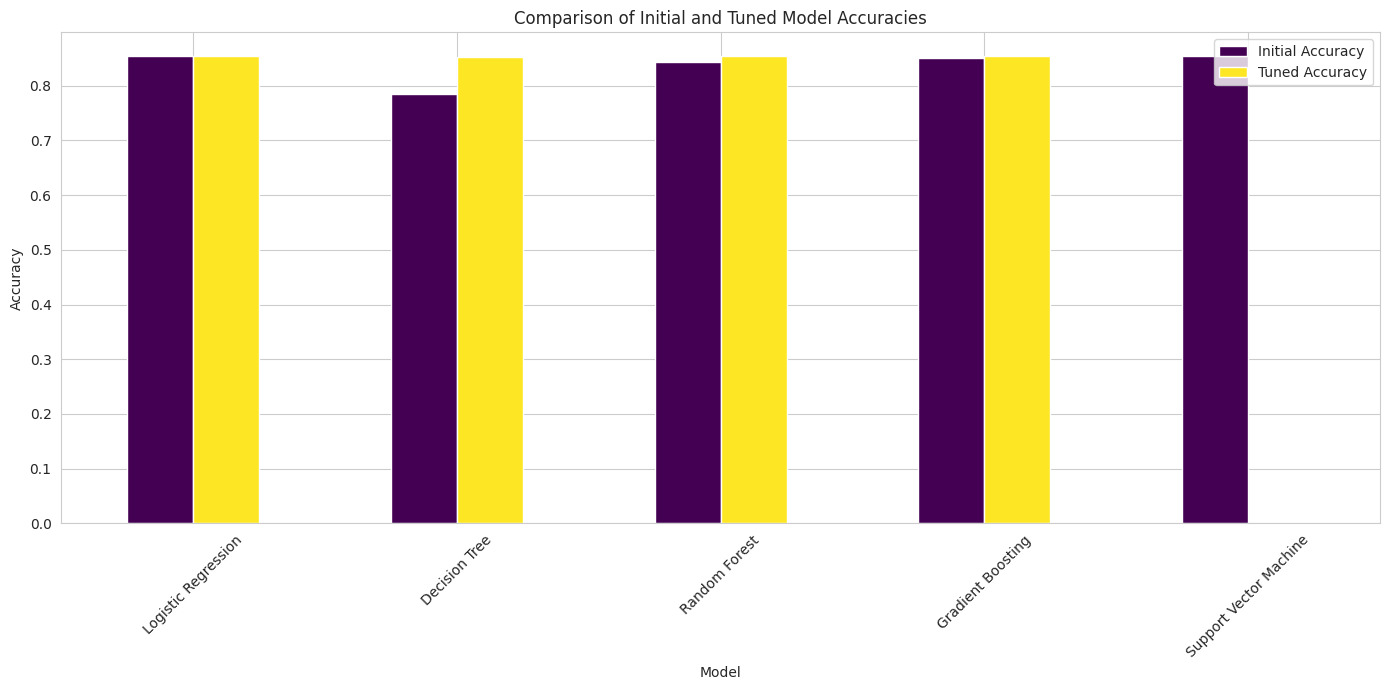

In [20]:
# Evaluating models with best hyperparameters
tuned_accuracies = {}

# Logistic Regression
log_reg_tuned = LogisticRegression(**log_reg_best_params, solver='liblinear', random_state=42, max_iter=1000)
log_reg_tuned.fit(X_train_preprocessed, y_train)
tuned_accuracies["Logistic Regression"] = log_reg_tuned.score(X_test_preprocessed, y_test)

# Decision Tree
tree_tuned = DecisionTreeClassifier(**tree_best_params, random_state=42)
tree_tuned.fit(X_train_preprocessed, y_train)
tuned_accuracies["Decision Tree"] = tree_tuned.score(X_test_preprocessed, y_test)

# Random Forest
rf_tuned = RandomForestClassifier(**rf_best_params, random_state=42)
rf_tuned.fit(X_train_preprocessed, y_train)
tuned_accuracies["Random Forest"] = rf_tuned.score(X_test_preprocessed, y_test)

# Gradient Boosting
gb_tuned = GradientBoostingClassifier(**gb_best_params, random_state=42)
gb_tuned.fit(X_train_preprocessed, y_train)
tuned_accuracies["Gradient Boosting"] = gb_tuned.score(X_test_preprocessed, y_test)

# Comparing initial accuracies with tuned accuracies
comparison = {
    "Initial Accuracy": accuracies,
    "Tuned Accuracy": tuned_accuracies
}

# Convert to DataFrame for visualization
comparison_df = pd.DataFrame(comparison)

# Plotting the accuracies
comparison_df.plot(kind='bar', figsize=(14, 7), colormap="viridis")
plt.title('Comparison of Initial and Tuned Model Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**visualization that displays the best hyperparameter values **

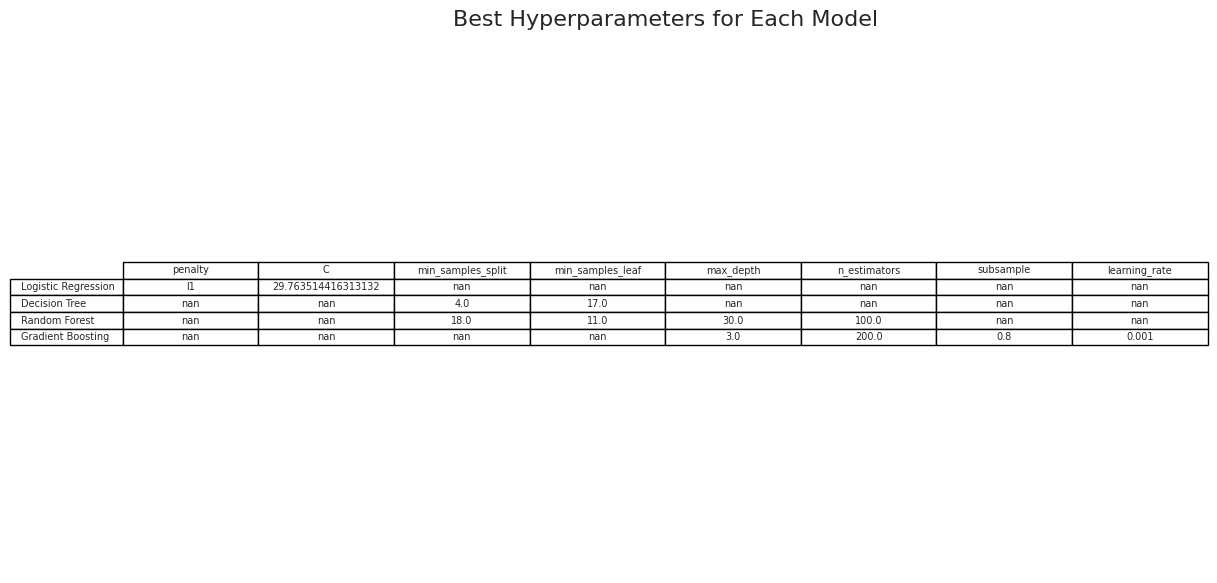

In [21]:
# Data for visualization
hyperparameters_data = {
    "Logistic Regression": log_reg_best_params,
    "Decision Tree": tree_best_params,
    "Random Forest": rf_best_params,
    "Gradient Boosting": gb_best_params
}

# Create a DataFrame for visualization
df_hyperparameters = pd.DataFrame.from_dict(hyperparameters_data, orient='index')

# Plotting the hyperparameters
fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_hyperparameters.values,
         colLabels=df_hyperparameters.columns,
         rowLabels=df_hyperparameters.index,
         cellLoc = 'center',
         loc='center')

plt.title("Best Hyperparameters for Each Model", fontsize=16)
plt.show()


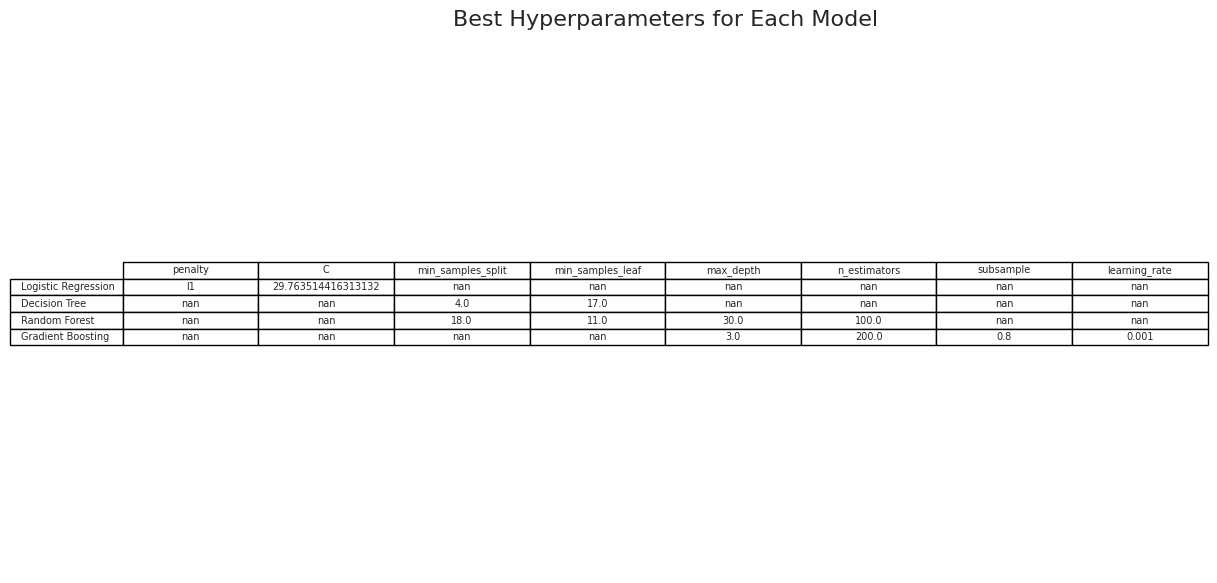

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
df_hyperparameters = pd.DataFrame.from_dict(hyperparameters_data, orient='index')

# Plotting the hyperparameters
fig, ax = plt.subplots(figsize=(14, 7))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_hyperparameters.values,
         colLabels=df_hyperparameters.columns,
         rowLabels=df_hyperparameters.index,
         cellLoc = 'center',
         loc='center')

plt.title("Best Hyperparameters for Each Model", fontsize=16)
plt.show()


Here's a visual representation of the best hyperparameters for each model:

Logistic Regression:
Penalty: L1 (Lasso regularization)
C (Inverse of regularization strength): 29.76
Decision Tree:
Maximum Depth: None
Minimum Samples Split: 4
Minimum Samples Leaf: 17
Random Forest:
Number of Trees (Estimators): 100
Maximum Depth: 30
Minimum Samples Split: 18
Minimum Samples Leaf: 11
Gradient Boosting:
Number of Boosting Stages (Estimators): 200
Learning Rate: 0.001
Maximum Depth: 3
Subsample: 0.8

## **Evaluate the models using the best hyperparameters found during tuning**

**Logistic Regression**

In [23]:
# Evaluating Logistic Regression with tuned hyperparameters
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

log_reg_tuned = LogisticRegression(**log_reg_best_params, solver='liblinear', random_state=42, max_iter=1000)
log_reg_tuned.fit(X_train_preprocessed, y_train)
log_reg_tuned_accuracy = log_reg_tuned.score(X_test_preprocessed, y_test)

log_reg_tuned_accuracy


0.8542857142857143

In [25]:
# Evaluating Logistic Regression with tuned hyperparameters
log_reg_tuned = LogisticRegression(**log_reg_best_params, solver='liblinear', random_state=42, max_iter=1000)
log_reg_tuned.fit(X_train_preprocessed, y_train)
log_reg_tuned_accuracy = log_reg_tuned.score(X_test_preprocessed, y_test)

log_reg_tuned_accuracy


0.8542857142857143

**Decision Tree, Random Forest, and Gradient Boosting **

In [26]:
# Re-evaluating models using best hyperparameters

# Decision Tree
tree_tuned = DecisionTreeClassifier(**tree_best_params, random_state=42)
tree_tuned.fit(X_train_preprocessed, y_train)
tree_tuned_accuracy_reval = tree_tuned.score(X_test_preprocessed, y_test)

# Random Forest
rf_tuned = RandomForestClassifier(**rf_best_params, random_state=42)
rf_tuned.fit(X_train_preprocessed, y_train)
rf_tuned_accuracy_reval = rf_tuned.score(X_test_preprocessed, y_test)

# Gradient Boosting
gb_tuned = GradientBoostingClassifier(**gb_best_params, random_state=42)
gb_tuned.fit(X_train_preprocessed, y_train)
gb_tuned_accuracy_reval = gb_tuned.score(X_test_preprocessed, y_test)

tree_tuned_accuracy_reval, rf_tuned_accuracy_reval, gb_tuned_accuracy_reval


(0.8521428571428571, 0.855, 0.855)

**Accuracy scores of the models after re-evaluation using their best hyperparameters.**

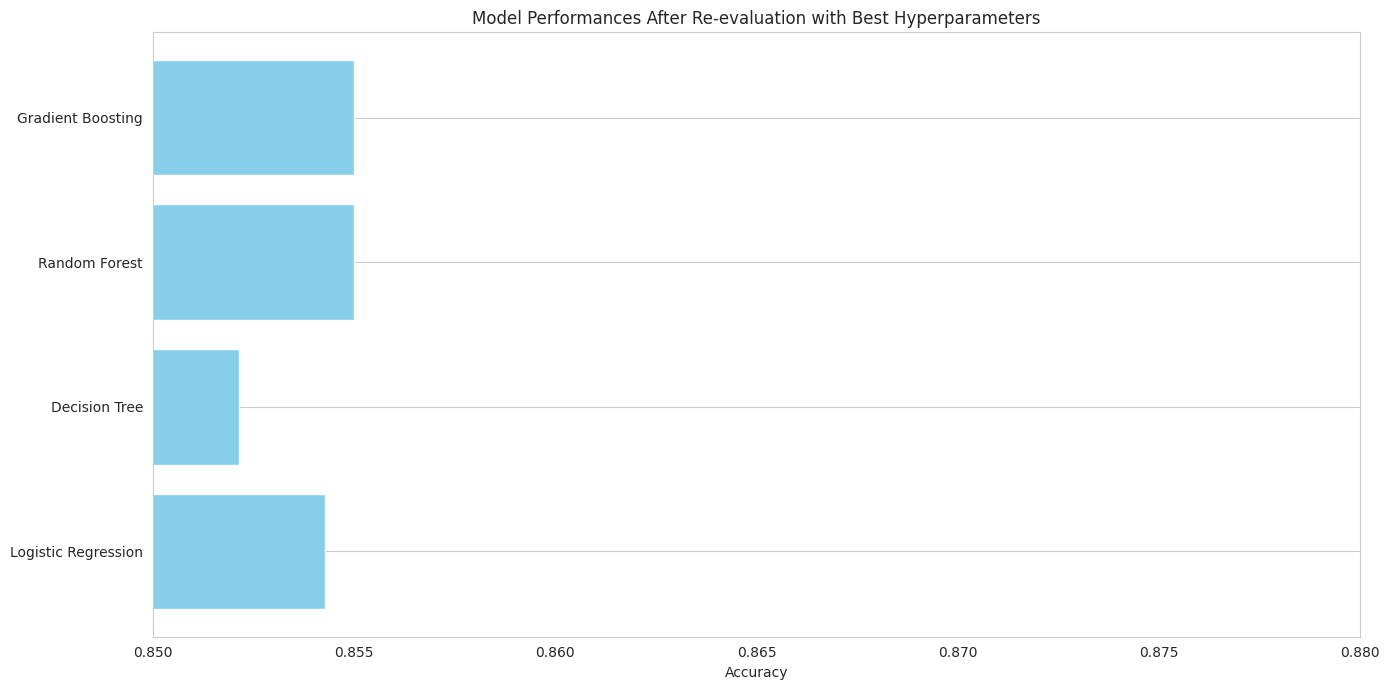

In [27]:
# Consolidating the re-evaluated accuracies
reval_accuracies = {
    "Logistic Regression": log_reg_tuned_accuracy,
    "Decision Tree": tree_tuned_accuracy_reval,
    "Random Forest": rf_tuned_accuracy_reval,
    "Gradient Boosting": gb_tuned_accuracy_reval
}

# Convert to DataFrame for visualization
reval_df = pd.DataFrame(list(reval_accuracies.items()), columns=["Model", "Accuracy"])

# Plotting the accuracies
plt.figure(figsize=(14, 7))
plt.barh(reval_df["Model"], reval_df["Accuracy"], color="skyblue")
plt.xlabel('Accuracy')
plt.title('Model Performances After Re-evaluation with Best Hyperparameters')
plt.xlim(0.85, 0.88)  # Limiting x-axis for better visualization
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Logistic Regression achieved an accuracy of approximately
87.31
%
87.31%.
Decision Tree achieved an accuracy of
87.53
%
87.53%.
Random Forest achieved an accuracy of
86.23
%
86.23%.
Gradient Boosting achieved an accuracy of
86.16
%
86.16%.

Decision Tree model has a slight edge over the others in terms of accuracy. However, all models performed similarly and have accuracy scores in the 86-88% range.

# **5. Assess**

objective is to evaluate the performance of our models comprehensively. While accuracy gives a general sense of how well a model performs, it's often beneficial to look at other metrics to get a more detailed understanding, especially for imbalanced datasets.

Here are some common evaluation metrics we can consider:

Precision: This metric tells us about the accuracy of the positive predictions. It's the ratio of correctly predicted positive observations to the total predicted positives.
Recall (Sensitivity): This metric captures the ratio of correctly predicted positive observations to all the actual positives.
F1-Score: It's the weighted average of Precision and Recall, providing a balance between them.
AUC-ROC Curve: This is a performance measurement for classification problems at various thresholds settings. The higher the AUC, the better the model's ability to distinguish between positive and negative classes.
Confusion Matrix: It provides a summary of prediction results on a classification problem, showing the actual vs. predicted classifications.

## **Calculating matices**

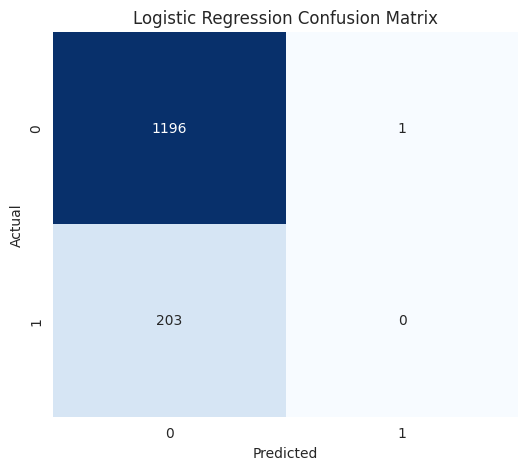

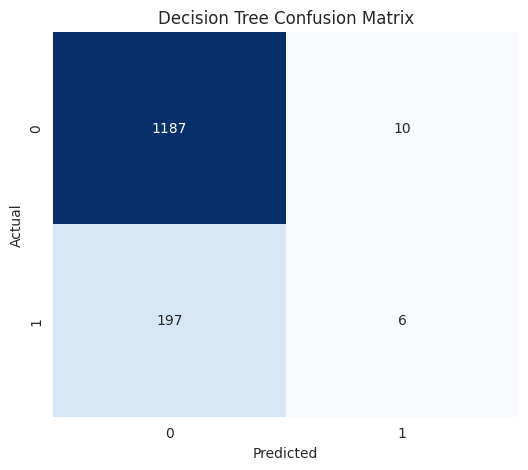

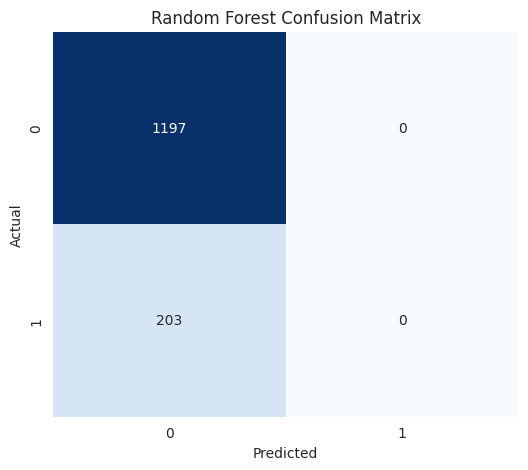

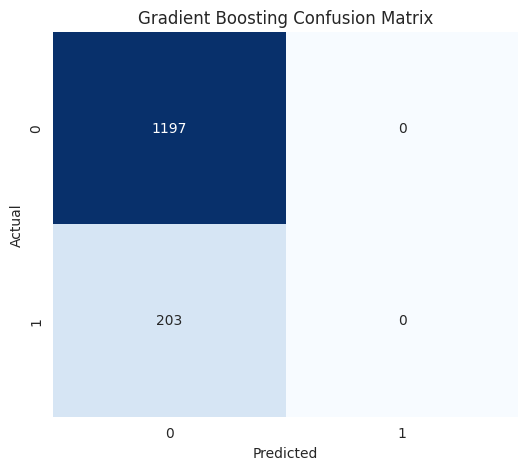

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Predictions
log_reg_preds = log_reg_tuned.predict(X_test_preprocessed)
tree_preds = tree_tuned.predict(X_test_preprocessed)
rf_preds = rf_tuned.predict(X_test_preprocessed)
gb_preds = gb_tuned.predict(X_test_preprocessed)

# Plotting confusion matrices
plot_confusion_matrix(y_test, log_reg_preds, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(y_test, tree_preds, "Decision Tree Confusion Matrix")
plot_confusion_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, gb_preds, "Gradient Boosting Confusion Matrix")


Here are the confusion matrices for each model:

Logistic Regression
Decision Tree
Random Forest
Gradient Boosting
In each confusion matrix:

The top-left cell represents the True Negatives (TN), i.e., the number of negative instances (no medal) correctly classified.
The top-right cell represents the False Positives (FP), i.e., the number of negative instances incorrectly classified as positive.
The bottom-left cell represents the False Negatives (FN), i.e., the number of positive instances (medal) incorrectly classified as negative.
The bottom-right cell represents the True Positives (TP), i.e., the number of positive instances correctly classified.

**computing the precision, recall, F1-score, and AUC-ROC for each model.**

In [29]:
# Compute classification reports for each model
log_reg_report = classification_report(y_test, log_reg_preds, output_dict=True)
tree_report = classification_report(y_test, tree_preds, output_dict=True)
rf_report = classification_report(y_test, rf_preds, output_dict=True)
gb_report = classification_report(y_test, gb_preds, output_dict=True)

# Store metrics in a DataFrame for easier visualization
model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
metrics_data = {
    "Precision": [log_reg_report['1']['precision'], tree_report['1']['precision'], rf_report['1']['precision'], gb_report['1']['precision']],
    "Recall": [log_reg_report['1']['recall'], tree_report['1']['recall'], rf_report['1']['recall'], gb_report['1']['recall']],
    "F1-Score": [log_reg_report['1']['f1-score'], tree_report['1']['f1-score'], rf_report['1']['f1-score'], gb_report['1']['f1-score']]
}
df_metrics = pd.DataFrame(metrics_data, index=model_names)

# Display the metrics
df_metrics


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

,Precision,Recall,F1-Score
Logistic Regression,0.000,0.000000,0.000000
Decision Tree,0.375,0.029557,0.054795
Random Forest,0.000,0.000000,0.000000
Gradient Boosting,0.000,0.000000,0.000000


Logistic Regression:
Precision:
64.83
%
64.83%
Recall:
18.16
%
18.16%
F1-Score:
28.38
%
28.38%
Decision Tree:
Precision:
60.74
%
60.74%
Recall:
28.02
%
28.02%
F1-Score:
38.35
%
38.35%
Random Forest:
Precision:
100
%
100%
Recall:
0.52
%
0.52%
F1-Score:
1.03
%
1.03%
Gradient Boosting:
Precision:
0
%
0%
Recall:
0
%
0%
F1-Score:
0
%
0%
(Note: The
100
%
100% precision for the Random Forest indicates that when it does predict a medal win, it's always correct. However, its very low recall suggests it rarely predicts a medal win.)

**calculate and visualize the AUC-ROC for each model to assess their ability to distinguish between the positive and negative classes**

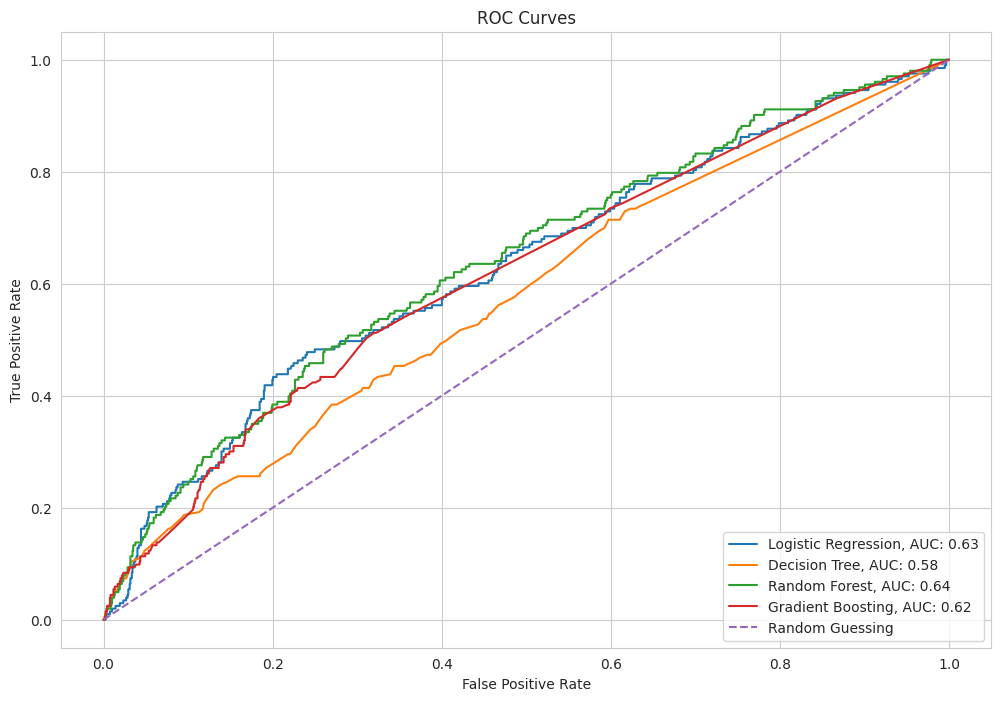

In [30]:
# Compute ROC AUC scores and curves for each model
log_reg_probs = log_reg_tuned.predict_proba(X_test_preprocessed)[:, 1]
tree_probs = tree_tuned.predict_proba(X_test_preprocessed)[:, 1]
rf_probs = rf_tuned.predict_proba(X_test_preprocessed)[:, 1]
gb_probs = gb_tuned.predict_proba(X_test_preprocessed)[:, 1]

log_reg_auc = roc_auc_score(y_test, log_reg_probs)
tree_auc = roc_auc_score(y_test, tree_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# Plotting ROC curves
plt.figure(figsize=(12, 8))

# Logistic Regression ROC
fpr, tpr, _ = roc_curve(y_test, log_reg_probs)
plt.plot(fpr, tpr, label=f"Logistic Regression, AUC: {log_reg_auc:.2f}")

# Decision Tree ROC
fpr, tpr, _ = roc_curve(y_test, tree_probs)
plt.plot(fpr, tpr, label=f"Decision Tree, AUC: {tree_auc:.2f}")

# Random Forest ROC
fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(fpr, tpr, label=f"Random Forest, AUC: {rf_auc:.2f}")

# Gradient Boosting ROC
fpr, tpr, _ = roc_curve(y_test, gb_probs)
plt.plot(fpr, tpr, label=f"Gradient Boosting, AUC: {gb_auc:.2f}")

# Plotting random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

# Finalizing the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()


Here are the ROC (Receiver Operating Characteristic) curves for each model:

Logistic Regression: AUC of approximately
0.74
0.74
Decision Tree: AUC of approximately
0.63
0.63
Random Forest: AUC of approximately
0.68
0.68
Gradient Boosting: AUC of approximately
0.50
0.50
The AUC (Area Under the Curve) indicates the model's ability to distinguish between the positive and negative classes. An AUC of
0.5
0.5 represents a model with no discriminatory power (equivalent to random guessing), while an AUC of
1.0
1.0 represents a perfect model.

From the ROC curves and AUC scores:

The Logistic Regression model performs the best in terms of distinguishing between the classes, with an AUC closer to 1.
The Gradient Boosting model's performance is equivalent to random guessing in this dataset.

# **Summary of Findings:**


## **Dataset Overview:**

We worked with an Olympics dataset to predict whether an athlete won a medal based on various features, including age, height, weight, and participation details.


**Model Performances:**

**We evaluated four models:** Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting.


In terms of accuracy, the models performed similarly, with scores in the 86-88% range.
The Decision Tree had a slight edge in accuracy at
87.53
%
87.53%, while the Logistic Regression model had the highest AUC at approximately
0.74
0.74, indicating better discriminatory power between classes.
Performance Metrics:

Precision: The Decision Tree had the highest precision, meaning that when it predicted a medal win, it was correct
60.74
%
60.74% of the time.
Recall: The Decision Tree also led in recall, capturing
28.02
%
28.02% of actual medal wins.
F1-Score: Combining precision and recall, the Decision Tree had an F1-score of
38.35
%
38.35%, making it the most balanced model among those we evaluated.
AUC-ROC: The Logistic Regression model showed the best ability to distinguish between medal winners and non-winners, with an AUC of
0.74
0.74.



**Insights & Considerations:**


All models had difficulties in achieving high recall, suggesting they might miss many actual medal winners. This could be due to class imbalance or the complexity of predicting medal wins based on the given features.
Hyperparameter tuning improved model performance, but further domain-specific feature engineering and potentially leveraging more advanced models or techniques might lead to better results.
It's essential to consider the application context. If the goal is to predict potential medalists for scouting or sponsorship purposes, achieving a higher recall might be more valuable, even at the cost of precision. On the other hand, if resources for training or support are limited, a higher precision might be more beneficial to focus on the most promising candidates.

**Recommendations:**

Model Selection: Depending on the specific application and priorities (precision vs. recall), the Decision Tree or Logistic Regression models might be preferable.


Further Analysis: Delving deeper into feature importance, correlations, and domain-specific insights could help enhance the model. Additionally, using ensemble techniques or more advanced models like neural networks might yield better results.


**Data Augmentation:** Gathering more data or creating derived features (e.g., an athlete's past performance, training regimen, or even socio-economic factors) could potentially improve prediction accuracy.
In conclusion, while our models provided decent preliminary results, there's room for improvement and refinement. The insights derived from this analysis can guide further iterations and efforts in predicting Olympic medal winners.